In [1]:
from phi.torch.flow import *
import matplotlib.pyplot as plt

#from src.eigenfluid import Eigenfluid
from src.shapes import *

# Helper functions for visualization
from src.visu import *

import time

<Figure size 1200x500 with 1 Axes>

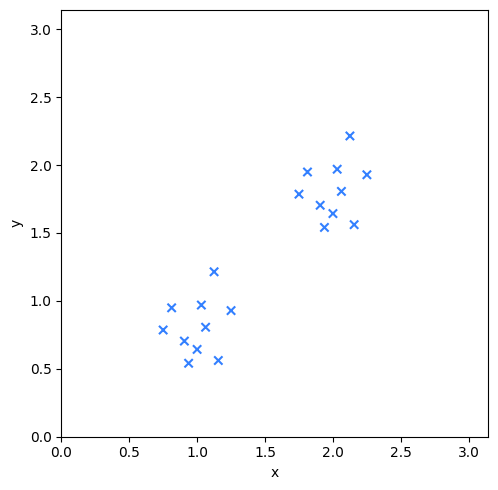

In [4]:
DOMAIN = Box(x=math.PI, y=math.PI)

c = Circle(pos=(1.5, 1.5), size=1)
s = Square(pos=(0.5, 1.0))
t = Triangle(pos=(0.5, 0.5))

sampler_union = ShapeSampler(c, t, N=10, h1=2, h2=7)
sampler_t = ShapeSampler(t, N=20, h1=3, h2=11)
sampler_c = ShapeSampler(c, N=20, h1=3, h2=11)
plot(vis.overlay(
    #PointCloud(t.create_points(sampler_t.p), bounds=DOMAIN, color="green"),
    PointCloud(t.create_points(sampler_union.p), bounds=DOMAIN),
    #PointCloud(c.create_points(sampler_c.p), bounds=DOMAIN, color="green"),
    PointCloud(c.create_points(sampler_union.p), bounds=DOMAIN)
))

<Figure size 1200x500 with 2 Axes>

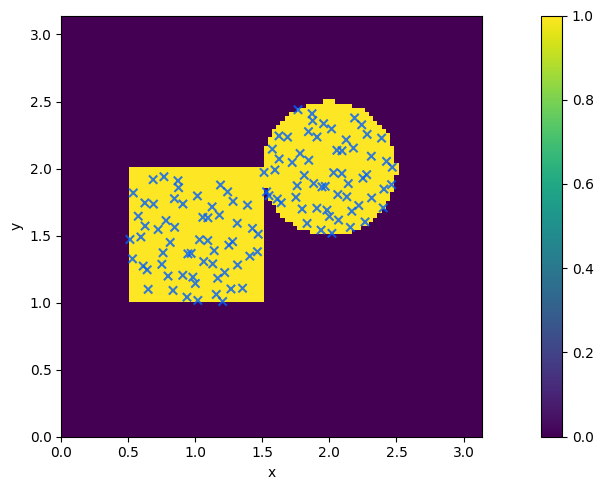

In [3]:
O = 30
U = 30

p_0, p_t = get_points_for_shapes(c, s, O=O, U=U)

vis.plot(vis.overlay(
    PointCloud(p_0, bounds=DOMAIN),
    PointCloud(p_t, bounds=DOMAIN),
    c.get_smoke() + s.get_smoke(),
))